Tensorflow and keras

       tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab     stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable  


d:\python.list\Al\al_venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,433 (72.00 KB)

 Trainable params: 18,433 (72.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 994us/step - accuracy: 0.6376 - loss: 5.7769 - val_accuracy: 0.6330 - val_loss: 5.8509
Epoch 2/1000
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 872us/step - accuracy: 0.6319 - loss: 5.8679 - val_accuracy: 0.6330 - val_loss: 5.8509
Epoch 3/1000
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - accuracy: 0.6419 - loss: 5.7097 - val_accuracy: 0.6330 - val_loss: 5.8509
Epoch 4/1000
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - accuracy: 0.6349 - loss: 5.8198 - val_accuracy: 0.6330 - val_loss: 5.8509
Epoch 5/1000
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - accuracy: 0.6363 - loss: 5.7983 - val_accuracy: 0.6330 - val_loss: 5.8509
Epoch 6/1000
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - accuracy: 0.6400 - loss: 5.7390 - val_accuracy: 0.6330 - val_loss: 5.8509
Epoch 7/1000
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step - accuracy: 0.6381 - loss: 5.7703 - val_accuracy: 0.6330 - val_loss: 5.8509
Epoch 8/1000
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 837us/step - accuracy: 0.6387 -

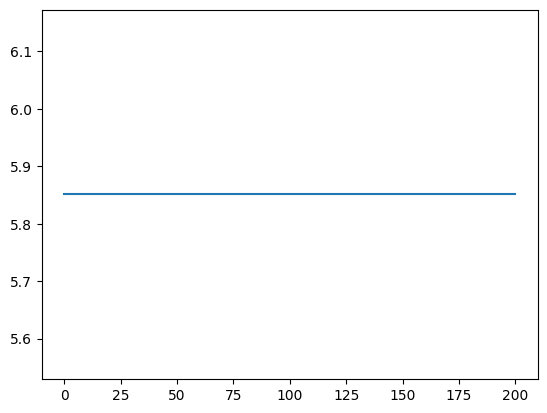

None


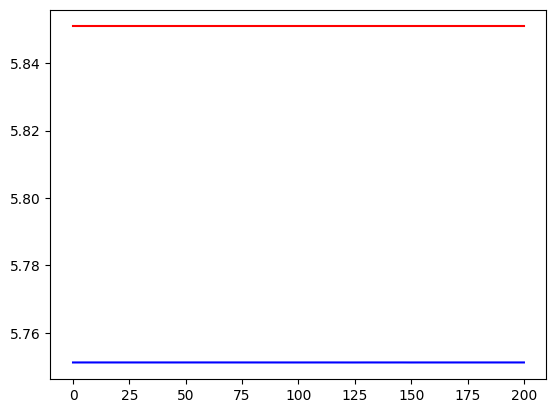

None


In [1]:
#پروژه تمرینه 3 بوتکمپ که روی دیتا ست کابل برق و ...میزنیم و دوتا خروجی داره 

import pandas as pd
import tensorflow as tf
from tensorflow import _KerasLazyLoader
from tensorflow import keras

df = pd.read_csv('D:\python.list\Data_for_UCI_named.csv')
print(df[0:5])

x = df.drop('stabf',axis=1)
y=df['stabf']

import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

model_encoder = LabelEncoder()
df_=['stabf']
for i in df_:
    df[i]=model_encoder.fit_transform(df[i])


x = df.drop('stabf',axis=1)
y=df['stabf']

model_scaler = StandardScaler()
model_scaler.fit_transform(x)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

fc = keras.Sequential()
fc.add(keras.layers.Dense(units=128,activation='relu',input_shape=[13]))
fc.add(keras.layers.Dense(units=128,activation='relu'))
fc.add(keras.layers.Dense(units=1))

loss=keras.losses.binary_crossentropy
fc.compile(optimizer='RMSprop',loss=loss,metrics=['accuracy'])

fc.summary()

early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss' , patience=200,restore_best_weights=True)
hist=fc.fit(x_train,y_train,batch_size=10,epochs=1000,callbacks = [early_stop],validation_data=(x_test,y_test))

import numpy as np
y_pred = fc.predict(x_test)
from sklearn.metrics import accuracy_score
#_,accuracy=fc.evaluate(x_test,y_test)
#y_pred = fc(torch.Tensor(x_test))
y_pred_class = (y_pred > 0.5)
accuracy = accuracy_score(y_test, y_pred_class)
print('Accuracy: %.2f' % (accuracy*100))

import matplotlib.pyplot as plt
plt.plot(hist.history['val_loss'])
print(plt.show())

plt.plot(hist.history['loss'],color='blue')
plt.plot(hist.history['val_loss'],color='red')
print(plt.show())

Pytorch

In [2]:
#پروژه تمرینه 3 بوتکمپ که روی دیتا ست کابل برق و ...میزنیم و دوتا خروجی داره 

import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('D:\python.list\Data_for_UCI_named.csv')

# Encode the categorical target variable
model_encoder = LabelEncoder()
df['stabf'] = model_encoder.fit_transform(df['stabf'])

# Split the data into features and target
x = df.drop('stabf', axis=1)
y = df['stabf']

# Scale the features
model_scaler = StandardScaler()
x = model_scaler.fit_transform(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Define the neural network model in PyTorch
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(13, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# Initialize the model, loss function and optimizer
model = Net()
criterion = nn.BCELoss()
optimizer = optim.RMSprop(model.parameters())

# Train the model
for epoch in range(1000):
    optimizer.zero_grad()
    output = model(torch.Tensor(x_train))
    loss = criterion(output, torch.Tensor(y_train).view(-1, 1))
    loss.backward()
    optimizer.step()

# Evaluate the model
with torch.no_grad():
    y_pred = model(torch.Tensor(x_test))
    y_pred_class = (y_pred > 0.5).float()
    accuracy = accuracy_score(y_test, y_pred_class.numpy())
    print('Accuracy: %.2f' % (accuracy * 100))


Accuracy: 98.95
